In [1]:
# 모듈 및 데이터 로드
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()

# x, y 데이터 생성
X = data.data

# 악성을 1, 양성을 0으로
y = 1 - data.target

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10]

# 로지스틱 회귀 모델 생성
model_lor = LogisticRegression(solver = 'lbfgs')
model_lor.fit(X,y)
y_pred = model_lor.predict(X)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


* 오차 행렬(혼동 행렬) 생성

In [2]:
# 종속 변수와 예측 결과로 혼동 행렬 생성
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y, y_pred)

print(conf_matrix)


[[337  20]
 [ 30 182]]


* 정확도

In [4]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y,y_pred)
accuracy

0.9121265377855887

* 정밀도

In [5]:
from sklearn.metrics import precision_score
precision = precision_score(y,y_pred)
precision

0.900990099009901

* 재현율

In [6]:
from sklearn.metrics import recall_score
recall = recall_score(y,y_pred)
recall

0.8584905660377359

* F1 score

In [7]:
from sklearn.metrics import f1_score
f1 = f1_score(y,y_pred)
f1

0.8792270531400966

* 예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.

In [18]:
from sklearn.preprocessing import Binarizer

threshold = 0.1
binarizer = Binarizer(threshold=threshold)

pred_proba = model_lor.predict_proba(X)
y_pred_proba = pred_proba[:, 0].reshape(-1, 1)
y_pred2 = binarizer.transform(y_pred_proba)




In [19]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기
conf_matrix = confusion_matrix(y, y_pred2)
accuracy = accuracy_score(y,y_pred2)
precision = precision_score(y,y_pred2)
recall = recall_score(y,y_pred2)
f1 = f1_score(y,y_pred2)

print(conf_matrix, accuracy, precision, recall, f1)

[[  1 356]
 [139  73]] 0.13005272407732865 0.17016317016317017 0.3443396226415094 0.22776911076443057


* ROC 곡선 시각화

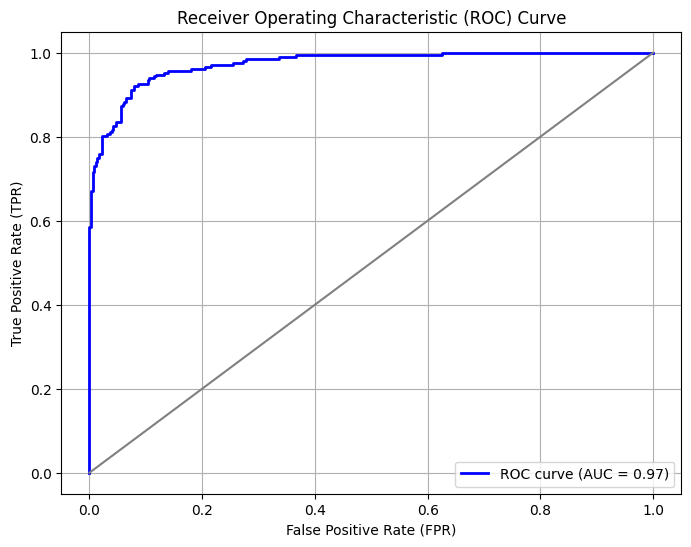

In [20]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


y_pred_proba = model_lor.predict_proba(X)[:, 1]

fpr, tpr, _ = roc_curve(y, y_pred_proba)
roc_auc = auc(fpr, tpr)  # AUC 계산

# ROC 곡선 그리기
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='-')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


* ROC AUC 값

In [21]:
from sklearn.metrics import roc_auc_score

y_pred_proba = model_lor.predict_proba(X)[:, 1]

# ROC AUC 점수 계산
roc_auc = roc_auc_score(y, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")


ROC AUC Score: 0.9741
